<AxesSubplot: >

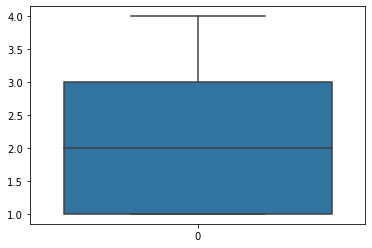

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
DF_Class_Value= pd.read_csv(r'C:\Users\USER\Documents\PUSL3121 Big Data Analytics (22SPM)\Scenario2.csv')
DF_Class_Value


sns.boxplot(DF_Class_Value['Buying'])

In [2]:
import numpy as np
import pandas as pd
DF_Class_Value= pd.read_csv(r'C:\Users\USER\Documents\PUSL3121 Big Data Analytics (22SPM)\Scenario2.csv')

DF_Class_Value.isnull().sum().sum()

0

In [ ]:
#Assumptions made - There are no null values or outliers in the dataset

In [4]:
DF_Class_Value

,ID,Buying,Maintain,Doors,Persons,LuggageBoot,Safety,Class Value
0,1,1,1,2,2,1,1,unacc
1,2,1,1,2,2,1,2,unacc
2,3,1,1,2,2,1,3,unacc
3,4,1,1,2,2,2,1,unacc
4,5,1,1,2,2,2,2,unacc
...,...,...,...,...,...,...,...,...
1589,1590,4,4,5,4,3,1,unacc
1590,1591,4,4,5,5,1,1,unacc
1591,1592,4,4,5,5,1,2,acc
1592,1593,4,4,5,5,2,1,unacc


In [2]:
probability_arr=[]
entropy_arr=[]
info_arr=[]

for col in DF_Class_Value.drop(columns='Class Value'):
    probability=DF_Class_Value[col].value_counts(normalize=True)
    print(col,'probability')
    print(probability)
    probability_arr.append(probability)
    
    # Entropy calculation = -(p(0)* log(p(0)) + p(1) * log(p(1)))
    entropy=-1*np.sum(np.log2(probability)*probability)
    print(col,'entropy:',entropy)
    entropy_arr.append(entropy)

    # Information gain is calculated by multiplying the probability of a class by the entropy of each feature
    info_gain=np.log2(probability)*probability
    print(col,'information gain',info_gain)
    info_arr.append(info_gain)

stats_value=np.column_stack((probability_arr,entropy_arr,info_arr))
stats_value

ID probability
1       0.000627
1071    0.000627
1069    0.000627
1068    0.000627
1067    0.000627
          ...   
530     0.000627
529     0.000627
528     0.000627
527     0.000627
1594    0.000627
Name: ID, Length: 1594, dtype: float64
ID entropy: 10.638435913990472
ID information gain 1      -0.006674
1071   -0.006674
1069   -0.006674
1068   -0.006674
1067   -0.006674
          ...   
530    -0.006674
529    -0.006674
528    -0.006674
527    -0.006674
1594   -0.006674
Name: ID, Length: 1594, dtype: float64
Buying probability
1    0.271016
2    0.271016
3    0.240276
4    0.217691
Name: Buying, dtype: float64
Buying entropy: 1.9940925027036762
Buying information gain 1   -0.510472
2   -0.510472
3   -0.494304
4   -0.478843
Name: Buying, dtype: float64
Maintain probability
1    0.271016
2    0.262861
3    0.240276
4    0.225847
Name: Maintain, dtype: float64
Maintain entropy: 1.9962739100942435
Maintain information gain 1   -0.510472
2   -0.506698
3   -0.494304
4   -0.484799
Name: M

array([[1       0.000627
        1071    0.000627
        1069    0.000627
        1068    0.000627
        1067    0.000627
                  ...
        530     0.000627
        529     0.000627
        528     0.000627
        527     0.000627
        1594    0.000627
        Name: ID, Length: 1594, dtype: float64, 10.638435913990472,
        1      -0.006674
        1071   -0.006674
        1069   -0.006674
        1068   -0.006674
        1067   -0.006674
                  ...
        530    -0.006674
        529    -0.006674
        528    -0.006674
        527    -0.006674
        1594   -0.006674
        Name: ID, Length: 1594, dtype: float64],
       [1    0.271016
        2    0.271016
        3    0.240276
        4    0.217691
        Name: Buying, dtype: float64, 1.9940925027036762,
        1   -0.510472
        2   -0.510472
        3   -0.494304
        4   -0.478843
        Name: Buying, dtype: float64],
       [1    0.271016
        2    0.262861
        3    0.240276


In [3]:
y = DF_Class_Value['Class Value']
X = DF_Class_Value[['Buying','Maintain','Doors','Persons','LuggageBoot','Safety']]

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = tree.DecisionTreeClassifier().fit(X,y)
print(model.score(X,y))


1.0


In [5]:
print(model.predict([[2, 1, 2, 3, 1, 2]]))

print(model.predict_proba([[2, 1, 2, 3, 1, 2]])) 


['unacc']
[[0. 1.]]


In [7]:
print(model.predict([[1, 1, 2, 3, 2 ,1]]))

print(model.predict_proba([[1, 1, 2, 3, 2, 1]])) 


['unacc']
[[0. 1.]]


In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(200, 200))
plot_tree(model, ax=ax)
plt.savefig("decision_tree.png", bbox_inches='tight')

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

DF_Class_Value= pd.read_csv(r'C:\Users\USER\Documents\PUSL3121 Big Data Analytics (22SPM)\Scenario2.csv')
y = DF_Class_Value['Class Value']
X = DF_Class_Value[['Buying','Maintain','Doors','Persons','LuggageBoot','Safety']]

model = DecisionTreeClassifier().fit(X,y)
print(model.score(X,y))

# Trained dataset values in the decision tree model are assogned in the 'model' variable
# X and y are your features and labels, respectively

# Performing 10-fold cross-validation
scores = cross_val_score(model, X, y, cv=10)

# Printing the mean and standard deviation of the accuracy scores
print('Accuracy: {:.2f} (+/- {:.2f})'.format(scores.mean(), scores.std() * 2))



1.0
Accuracy: 0.92 (+/- 0.17)
